# Data Overview

Dataset ObesityDataSet:
1. Gender = Laki-laki atau Wanita
2. Age = Usia seseorang dalam tahun
3. Height = Tinggi dalam meter
4. Weight = Berat dalam kilogram
5. family_history_with_overweight = Apakah orang tersebut memiliki riwayat keluarga dengan kelebihan
berat badan
6. FAVC = Jika orang tersebut sering mengonsumsi makanan berkalori tinggi (ya/tidak)
7. FCVC = Frekuensi konsumsi sayuran (skala dari 1 hingga 3)
8. NCP = Jumlah makanan utama per hari
9. CAEC = Frekuensi mengonsumsi makanan di antara waktu makan (Tidak pernah, Kadang-kadang,
Sering, Selalu)
10. SMOKE = Apakah orang tersebut merokok (ya/tidak)
11. CH2O = Asupan air harian (skala dari 1 hingga 3)
12. SCC = Jika orang tersebut memantau asupan kalori mereka (ya/tidak)
13. FAF = Frekuensi aktivitas fisik (skala dari 0 hingga 3)
14. TUE = Waktu yang dihabiskan untuk menggunakan teknologi (skala dari 0 hingga 3)
15. CALC = Frekuensi konsumsi alkohol (Tidak pernah, Kadang-kadang, Sering, Selalu)
16. MTRANS = Moda transportasi utama (Mobil, Sepeda, Sepeda Motor, Transportasi Umum, Jalan Kaki)
17.  NObeyesedad = Tingkat obesitas (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle as pkl

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


# Data Preparation

In [265]:
df=pd.read_csv('ObesityDataSet1.csv',delimiter=',')

In [266]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,31,1.87,128.87,yes,yes,2.96,3.00,Sometimes,yes,1.28,no,0.90,1.875,Sometimes,Automobile,Obesity_Type_II
1,Female,18,1.59,40.00,yes,yes,2.00,1.00,Frequently,no,1.00,no,0.00,2.000,no,Public_Transportation,Insufficient_Weight
2,Female,44 years,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
3,Male,31,1.68,102.00,yes,yes,2.94,2.14,Sometimes,no,1.25,no,1.18,0.778,no,Public_Transportation,Obesity_Type_II
4,Male,22,1.74,75.00,yes,yes,3.00,3.00,Frequently,no,1.00,no,1.00,0.000,no,Automobile,Normal_Weight


In [267]:
df.shape

(1055, 17)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1055 non-null   object 
 1   Age                             1055 non-null   object 
 2   Height                          1055 non-null   float64
 3   Weight                          1055 non-null   float64
 4   family_history_with_overweight  1055 non-null   object 
 5   FAVC                            1055 non-null   object 
 6   FCVC                            1055 non-null   float64
 7   NCP                             1055 non-null   float64
 8   CAEC                            1029 non-null   object 
 9   SMOKE                           1055 non-null   object 
 10  CH2O                            1055 non-null   float64
 11  SCC                             1055 non-null   object 
 12  FAF                             10

In [269]:
df.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                               0
NCP                                0
CAEC                              26
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                               37
CALC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64

In [270]:
df.duplicated().sum()

np.int64(9)

In [271]:
df = df.drop_duplicates()

In [272]:
df = df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Height': 'height',
    'Weight': 'weight',
    'family_history_with_overweight': 'family_history_overweight',
    'FAVC': 'high_calorie_food',
    'FCVC': 'vegetable_freq',
    'NCP': 'main_meals_per_day',
    'CAEC': 'snack_freq',
    'SMOKE': 'smoke',
    'CH2O': 'water_intake',
    'SCC': 'calorie_monitoring',
    'FAF': 'physical_activity',
    'TUE': 'tech_time',
    'CALC': 'alcohol_freq',
    'MTRANS': 'transport_mode',
    'NObeyesdad': 'obesity_level'
})


In [ ]:
for col in df.select_dtypes(include=['object', 'category']).columns.tolist():
    df[col] = df[col].str.lower()

# Split Data into Train and Test

In [274]:
x = df.drop(['obesity_level'],axis=1)
y = df['obesity_level']

In [275]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.2, random_state = 42)

In [276]:
x_train.head()

,gender,age,height,weight,family_history_overweight,high_calorie_food,vegetable_freq,main_meals_per_day,snack_freq,smoke,water_intake,calorie_monitoring,physical_activity,tech_time,alcohol_freq,transport_mode
257,female,21,1.75,133.66,yes,yes,3.00,3.00,sometimes,no,2.25,no,1.61,0.849,sometimes,public_transportation
352,female,19,1.56,50.00,no,yes,2.00,1.00,sometimes,no,1.00,no,0.00,2.000,no,public_transportation
60,female,26,1.64,111.83,yes,yes,3.00,3.00,sometimes,no,2.55,no,0.00,0.196,sometimes,public_transportation
345,male,18,1.71,83.29,yes,yes,2.01,2.72,sometimes,no,1.66,no,1.00,0.605,sometimes,public_transportation
382,female,19,1.65,82.00,yes,yes,3.00,3.00,sometimes,no,1.00,no,0.00,1.000,sometimes,public_transportation


In [277]:
y_train.head()

257       obesity_type_iii
352          normal_weight
60        obesity_type_iii
345    overweight_level_ii
382         obesity_type_i
Name: obesity_level, dtype: object

# Handle Missing Value & Unusual Value

In [278]:
df_copy = x_train.copy()
df_copy['age'] = df_copy['age'].astype(str).str.replace(r'\D+', '', regex=True)
df_copy['age'] = pd.to_numeric(df_copy['age'], errors='coerce')

In [279]:
cat_feat = df_copy.select_dtypes(include=['object', 'category']).columns.tolist()
num_feat = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()

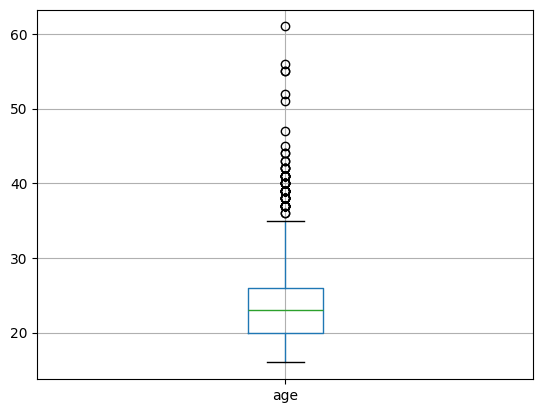

Skewness: 1.6407969211542814
Kurtosis: 3.52320199249482


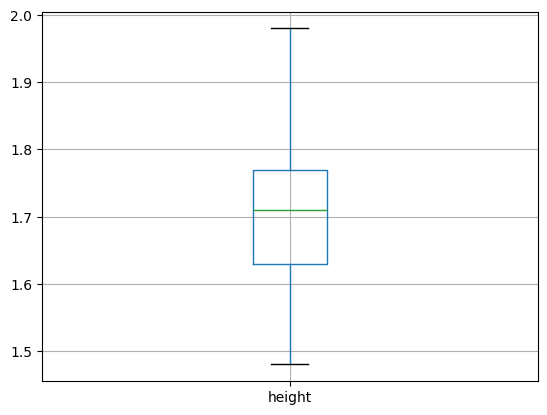

Skewness: -0.048111164640154865
Kurtosis: -0.5936734876552925


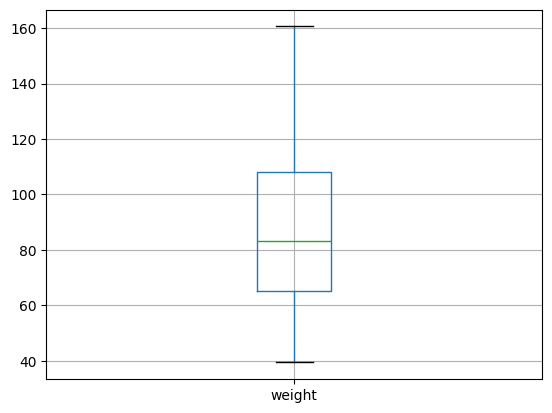

Skewness: 0.2198316260126077
Kurtosis: -0.7574717699886171


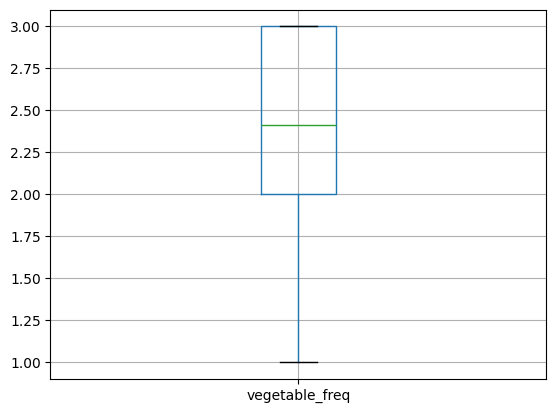

Skewness: -0.46322861457501086
Kurtosis: -0.6401320011417289


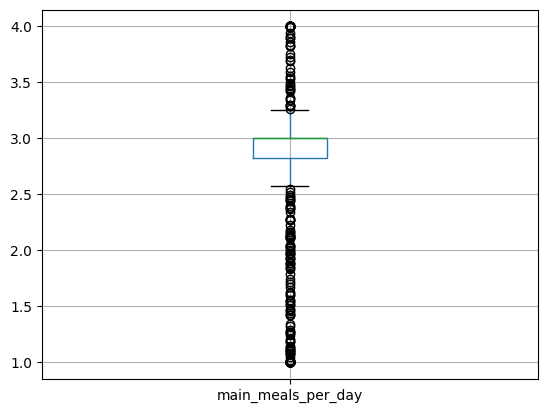

Skewness: -1.2315689358845985
Kurtosis: 0.9874003865995715


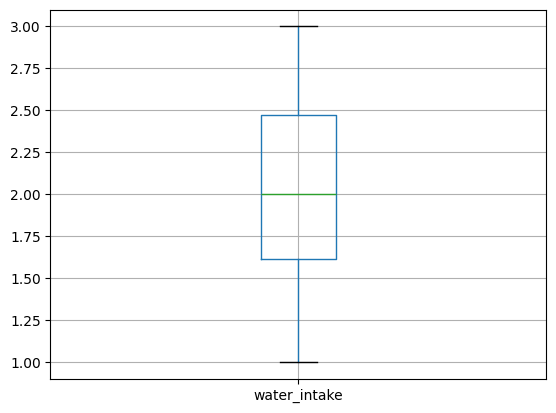

Skewness: -0.13066239690715228
Kurtosis: -0.8680882614525434


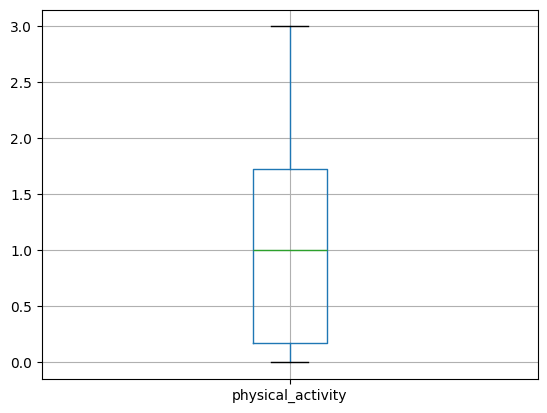

Skewness: 0.455634540017396
Kurtosis: -0.6738678590800911


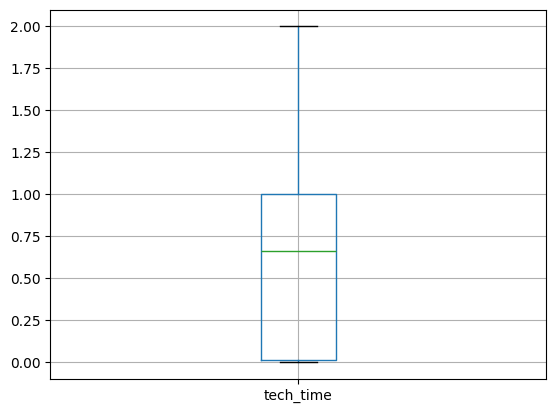

Skewness: 0.5827039925849427
Kurtosis: -0.5417020650192281


In [280]:
for col in num_feat:
    boxplot = df_copy.boxplot(column=col)
    plt.show()

    print(f"Skewness: {df_copy[col].skew()}")
    print(f"Kurtosis: {df_copy[col].kurt()}")

Untuk fitur dengan distribusi miring |skewness| > 1 atau mendekati 1, imputasi dengan median lebih cocok, karena median tidak terpengaruh oleh nilai ekstrem (outlier).

Untuk fitur dengan distribusi mendekati normal/simetris (|skewness| < 1), imputasi dengan mean masih aman dan efisien.

Untuk kolum age dan main_meals_per_day sebaiknya menggunakan median karena skewnessnya lebih dari 1 dan memiliki outlier, sisanya tetap aman dengan mean.

In [281]:
for col in num_feat:
    stat, p = shapiro(df_copy[col].dropna())
    print(f"{col}:")
    print(f"  p-value = {p}")

age:
  p-value = 5.334195845745451e-27
height:
  p-value = 2.890538852071671e-05
weight:
  p-value = 1.2694422590948623e-10
vegetable_freq:
  p-value = 2.1384522989430054e-27
main_meals_per_day:
  p-value = 4.034709227724952e-35
water_intake:
  p-value = 9.390025505732293e-19
physical_activity:
  p-value = 5.15867856244354e-21
tech_time:
  p-value = 5.759690665099208e-23


Karena semua numerical feature kita memiliki shapiro p-valuenya di bawah 0.05, ini menandakan bahwa datanya tidak berdistribusi normal sehingga dapat menggunakan RobustScaler untuk scaling

### One Hot

In [282]:
x_train['transport_mode'].value_counts()

transport_mode
public_transportation    616
automobile               192
walking                   22
motorbike                  3
bike                       3
Name: count, dtype: int64

### Ordinal

In [283]:
x_train['snack_freq'].value_counts()

snack_freq
sometimes     696
frequently     88
always         20
no             12
Name: count, dtype: int64

In [284]:
x_train['alcohol_freq'].value_counts()

alcohol_freq
sometimes     556
no            245
frequently     35
Name: count, dtype: int64

### Binary

In [285]:
x_train['calorie_monitoring'].value_counts()

calorie_monitoring
no     803
yes     33
Name: count, dtype: int64

In [286]:
x_train['smoke'].value_counts()

smoke
no     819
yes     17
Name: count, dtype: int64

In [287]:
x_train['high_calorie_food'].value_counts()

high_calorie_food
yes    738
no      98
Name: count, dtype: int64

In [288]:
x_train['family_history_overweight'].value_counts()

family_history_overweight
yes    686
no     150
Name: count, dtype: int64

In [289]:
x_train['gender'].value_counts()

gender
female    418
male      418
Name: count, dtype: int64

In [290]:
# def clean(df):
#     df = df.copy()
#     df['age'] = df['age'].astype(str).str.replace(r'\D+', '', regex=True)
#     df['age'] = pd.to_numeric(df['age'], errors='coerce')
#     return df

In [291]:
from cleaning import clean 
cleaner = FunctionTransformer(clean, validate=False)

In [292]:
ordinal_feat = ['gender', 'family_history_overweight', 'high_calorie_food',
                'smoke', 'calorie_monitoring', 'snack_freq', 'alcohol_freq']
onehot_feat = ['transport_mode']

median_cols = ['age', 'main_meals_per_day']
mean_cols = ['height', 'weight', 'vegetable_freq', 'water_intake', 'physical_activity', 'tech_time']
ordinal_categories = [
    ['male', 'female'],
    ['no', 'yes'],
    ['no', 'yes'],
    ['no', 'yes'],
    ['no', 'yes'],
    ['no', 'sometimes', 'frequently', 'always'],
    ['no', 'sometimes', 'frequently']
]


In [293]:
numeric_preprocess = ColumnTransformer(transformers=[
    ('median_imputer', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ]), median_cols),
    
    ('mean_imputer', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', RobustScaler())
    ]), mean_cols)
])

ordinal_preprocess= Pipeline([('cat_imputer', SimpleImputer(strategy='most_frequent')),
                                  ('cat_encoder', OrdinalEncoder(categories=ordinal_categories))])
onehot_preprocess = Pipeline([('cat_imputer', SimpleImputer(strategy='most_frequent')),
                              ('cat_onehot', OneHotEncoder(handle_unknown='ignore'))])

In [294]:
column_preprocess = ColumnTransformer([
    ('numPreprocess', numeric_preprocess, num_feat),
    ('catOrdinalPreprocess', ordinal_preprocess, ordinal_feat),
    ('catOneHotPreprocess', onehot_preprocess, onehot_feat)
], remainder='passthrough')

In [295]:
preprocess = Pipeline([
    ('cleaner', cleaner),
    ('columnwise', column_preprocess)
])

In [296]:
preprocess

Pipeline(steps=[('cleaner',
                 FunctionTransformer(func=<function clean at 0x0000021DE5DF7130>)),
                ('columnwise',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numPreprocess',
                                                  ColumnTransformer(transformers=[('median_imputer',
                                                                                   Pipeline(steps=[('imputer',
                                                                                                    SimpleImputer(strategy='median')),
                                                                                                   ('scaler',
                                                                                                    RobustScaler())]),
                                                                                   ['age',
                                                                                    'main_meals_per_day']),
                                                                                  ('me...
                                                                                               'frequently',
                                                                                               'always'],
                                                                                              ['no',
                                                                                               'sometimes',
                                                                                               'frequently']]))]),
                                                  ['gender',
                                                   'family_history_overweight',
                                                   'high_calorie_food', 'smoke',
                                                   'calorie_monitoring',
                                                   'snack_freq',
                                                   'alcohol_freq']),
                                                 ('catOneHotPreprocess',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transport_mode'])]))])

In [297]:
x_train_preprocess = preprocess.fit_transform(x_train)

In [298]:
x_train.shape

(836, 16)

In [299]:
x_train_preprocess.shape

(836, 20)

# Compare Two Models

### Random Forest

In [300]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 4, 5, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

In [301]:
rf_pred = Pipeline([
    ('preprocessing', preprocess),
    ('classifier', RandomForestClassifier())])

In [302]:
grid_search = GridSearchCV(
    estimator=rf_pred,
    param_grid=param_grid,
    cv=5,                        
    scoring='accuracy',          
    n_jobs=-1,                   
    verbose=2
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('cleaner',
                                                         FunctionTransformer(func=<function clean at 0x0000021DE5DF7130>)),
                                                        ('columnwise',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('numPreprocess',
                                                                                          ColumnTransformer(transformers=[('median_imputer',
                                                                                                                           Pipeline(steps=[('imputer',
                                                                                                                                            SimpleImputer(strategy='median')),
                                                                                                                                           (...
                                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                                          ['transport_mode'])]))])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 4, 5, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

### Logistic Regression

In [304]:
logreg_pred = Pipeline([
    ('preprocessing', preprocess),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial'))
])

param_grid_logreg = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'saga'],
}


In [305]:
logreg_grid = GridSearchCV(
    estimator=logreg_pred,
    param_grid=param_grid_logreg,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

logreg_grid.fit(x_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('cleaner',
                                                         FunctionTransformer(func=<function clean at 0x0000021DE5DF7130>)),
                                                        ('columnwise',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('numPreprocess',
                                                                                          ColumnTransformer(transformers=[('median_imputer',
                                                                                                                           Pipeline(steps=[('imputer',
                                                                                                                                            SimpleImputer(strategy='median')),
                                                                                                                                           (...
                                                                                          Pipeline(steps=[('cat_imputer',
                                                                                                           SimpleImputer(strategy='most_frequent')),
                                                                                                          ('cat_onehot',
                                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                                          ['transport_mode'])]))])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           multi_class='multinomial'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=1)

# Evaluasi

In [303]:
rf_model = grid_search.best_estimator_
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

insufficient_weight       0.96      0.96      0.96        28
      normal_weight       0.76      0.90      0.83        21
     obesity_type_i       1.00      0.92      0.96        39
    obesity_type_ii       0.97      1.00      0.98        28
   obesity_type_iii       1.00      1.00      1.00        29
 overweight_level_i       0.93      0.87      0.90        31
overweight_level_ii       0.94      0.94      0.94        34

           accuracy                           0.94       210
          macro avg       0.94      0.94      0.94       210
       weighted avg       0.95      0.94      0.94       210



Kinerja per kelas (F1-score):
Sangat tinggi untuk hampir semua kelas, terutama:
- obesity_type_iii: 1.00
- obesity_type_ii: 0.98
- obesity_type_i: 0.96
- insufficient_weight: 0.96
- normal_weight sedikit lebih rendah (0.83), tapi recallnya tinggi: 0.90

In [306]:
logreg_model = logreg_grid.best_estimator_
y_pred = logreg_model.predict(x_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

insufficient_weight       0.90      0.96      0.93        28
      normal_weight       0.94      0.76      0.84        21
     obesity_type_i       0.91      0.77      0.83        39
    obesity_type_ii       0.78      1.00      0.88        28
   obesity_type_iii       1.00      1.00      1.00        29
 overweight_level_i       0.89      0.81      0.85        31
overweight_level_ii       0.81      0.88      0.85        34

           accuracy                           0.88       210
          macro avg       0.89      0.88      0.88       210
       weighted avg       0.89      0.88      0.88       210



Kinerja per kelas (F1-score):
- Menurun secara keseluruhan.
- obesity_type_i turun menjadi 0.83 (recall hanya 0.77).
- normal_weight f1-score juga 0.84, tapi recall rendah: 0.76 (berarti model gagal menangkap banyak kasus normal).
- obesity_type_ii: recall tinggi (1.00) tapi precision rendah (0.78), artinya banyak false positive.
- overweight_level_ii: precision rendah (0.81), meskipun recall 0.88.
- overweight_level_ii: precision rendah (0.81), meskipun recall 0.88.

Model pertama secara keseluruhan jauh lebih baik, tidak hanya dari akurasi, tapi juga kestabilan antar kelas.

Model kedua cenderung kurang konsisten — beberapa kelas overpredict (misal obesity_type_ii) dan yang lain underperform (obesity_type_i, overweight_level_ii).

Sehingga jika kita bandingkan kedua model, model pertama (Random Forest) lebih siap untuk dipake.

In [307]:
filename = 'model.pkl'
pkl.dump(rf_model, open(filename, 'wb'))